In [50]:
import pandas as pd
import matplotlib as mlp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as s


In [5]:
tbl = pd.read_excel("data\dummy.xlsx")
tbl

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8560\2670678898.py:1: SyntaxWarning: invalid escape sequence '\d'
  tbl = pd.read_excel("data\dummy.xlsx")


,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


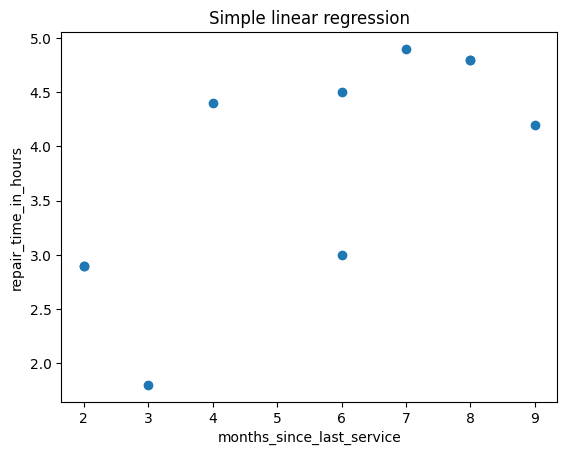

In [10]:
x = tbl['months_since_last_service']
y = tbl['repair_time_in_hours']
plt.scatter(x, y)
plt.ylabel('repair_time_in_hours')
plt.xlabel('months_since_last_service')
plt.title('Simple linear regression')
plt.show()

now we will perform regression analysis

In [11]:
from statsmodels.formula.api import ols
reg = ols(formula= 'repair_time_in_hours ~ months_since_last_service', data=tbl).fit()
print(reg.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Wed, 26 Mar 2025   Prob (F-statistic):             0.0163
Time:                          00:00:35   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


- y = 2.147 + 0.3041months_since_last_service
- here we use only ne independent variable months_since_last_service
- since p values is greater than 0.05 we can reject the null hypothesis that the mean is equal to 0
- R-squared: 0.534

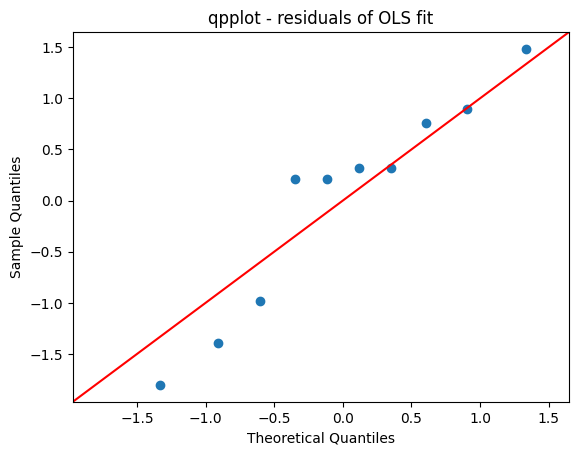

In [13]:
res = reg.resid # residuals
probplot = s.ProbPlot(res, stats.norm, fit=True) # probability plot
fig = probplot.qqplot(line='45')
h = plt.title('qpplot - residuals of OLS fit')
plt.show()

normal probability plot for the categorical data

next we solving using dummy variables

In [25]:
just_dummies = pd.get_dummies(tbl['type_of_repair'])
step1 = pd.concat([tbl, just_dummies], axis = 1)  
step1.drop(['type_of_repair'], inplace=True, axis =1)
step1.mechanical = step1.mechanical.astype(int)
step1.electrical = step1.electrical.astype(int)
step1.head()

,servicecall,months_since_last_service,repair_time_in_hours,electrical,mechanical
0,1,2,2.9,1,0
1,2,6,3.0,0,1
2,3,8,4.8,1,0
3,4,3,1.8,0,1
4,5,2,2.9,1,0


In [28]:
result = sm.OLS(step1['repair_time_in_hours'], s.add_constant(step1[['months_since_last_service','electrical']])).fit()
#                           ^                               ^                          ^
#                           |                               |                          |
#                        dependent variable         independent variable      reference category

#s.add_constant() adds a constant term to the predictor, i.e., the intercept

print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Wed, 26 Mar 2025   Prob (F-statistic):            0.00105
Time:                          01:53:43   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


##### y = 0.9305 + 0.388(months_since_last_service) + 1.263(electrical/mechanical) 
- if x2 = 0 then the relation is for mechanical repair
- if x2 = 1 then the relation is for electrical repain
- so, electrical repairs take 1.26 hours more than mechincal repairs on average
- for Electrical y = 0.9305 + 0.388(months_since_last_service) + 1.263(1) 
-                    y = 2.19 + 0.388(months_since_last_service)
- for Mechanical y = 0.9305 + 0.388(months_since_last_service) + 1.263(0) 
-                    y = 0.9305 + 0.388(months_since_last_service)
- here we have used 2 independent variables 
- R-squared: 0.859 (increased from before)


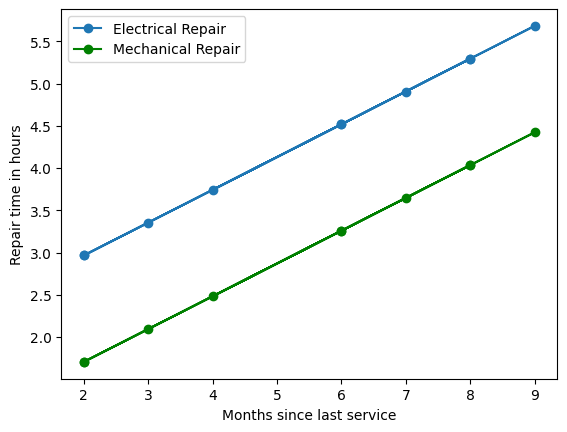

In [34]:
y1 = 2.19 + 0.388*x
y2 = 0.9305 + 0.388*x

plt.plot(x, y1, 'o-', label='Electrical Repair')
plt.plot(x, y2, 'go-', label='Mechanical Repair')
plt.xlabel('Months since last service')
plt.ylabel('Repair time in hours')
plt.legend(loc='best')
#plt.show()

### interpretaion of the model
- B2 indicates the difference b/w the mean repain time for an electrical repain and the mean repair time for a mechanical repair
- if B2 is positive, then the mean repair time for an electrical repair is higher than the mean repair time for a mechanical repair
- if B2 = 0, then the mean repair time for an electrical repair and mechanical repair is the same, so the time b/w e repair and m-repain and the type of repair is not related.


#### Q2) we want to know if the average months salary is different for male and female employees
if both genders have equal experience, but the average salary is different, then we can say that the salary is not equal for both genders.

In [36]:
tbl2 = pd.read_excel('data\dummy2.xlsx')
tbl2

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_8560\2952669932.py:1: SyntaxWarning: invalid escape sequence '\d'
  tbl2 = pd.read_excel('data\dummy2.xlsx')


,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


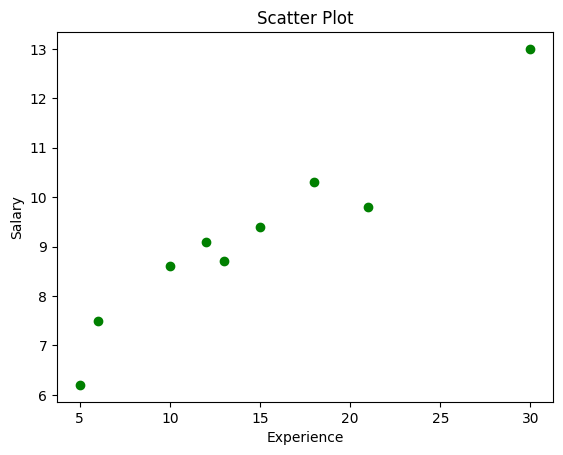

<Figure size 200x200 with 0 Axes>

In [41]:
x = tbl2.Experience
y = tbl2.Salary

plt.scatter(x, y, color ="green")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot")
plt.figure(figsize=(2,2))
plt.show()

now we will look at the residual plot

In [43]:
reg2 = ols(formula = 'y ~ x', data = tbl2).fit()
# x is the experience and y is the salary
reg2.summary()

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.30e-05
Time:                        08:35:30   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8093      0.404     14.386      0.000       4.854       6.764
x              0.2332      0.025      9.360      0.000       0.174       0.292
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   1.171
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.432
Skew:                          -0.918   Prob(JB):                        0.489
Kurtosis:                       2.331   Cond. No.                         35.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 5.8093 + 0.2332x
this is our regression equation.
- experience is signigicant as p value is less than 0.05

    now we do residual analysis

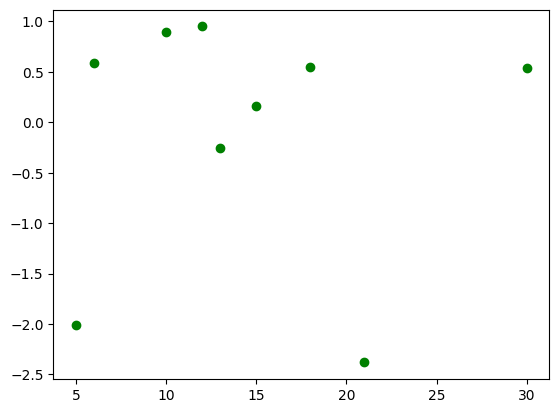

In [45]:
influence = reg2.get_influence()
resid_student = influence.resid_studentized_external
plt.figure()
plt.scatter(x, resid_student, color = 'green')
#here we are plotting the residuals against the independent variable
#get_influence() returns an instance of Influence with methods and data to analyze the influence of each observation

since most of the points are above y = -0.5.
this means there is a problem in assumption, or there is some other influencing vairable
the correct plot would have been if all points were evenly distributed between -y and +y variable

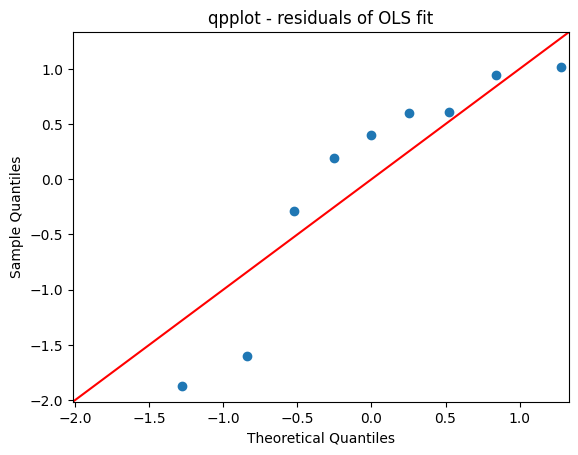

In [46]:
res = reg2.resid
probplot = s.ProbPlot(res, stats.norm, fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qpplot - residuals of OLS fit')
plt.show()  

here also we observe that 2/3 of the points are above the line, it should actuall sit on the line.
so exrror is not following equal variance

now we will do another reg analysis for just gender vs salary

In [52]:
just_dummies2 = pd.get_dummies(tbl2.Gender)
just_dummies2
# x2 = 0 (males) and x2 = 1 (females)

,Female,Male
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
5,True,False
6,True,False
7,True,False
8,True,False


In [57]:
step1 = pd.concat([tbl2, just_dummies2], axis = 1)
step1.drop(['Gender', 'Male'], inplace = True, axis =1)
# to run the regression we want to get rid of string 'male' and 'female'
# and we want to get rid of one dummy to get rid of the dummy variable trap
# arbitrarily drop male, so coeffients on female would show effect of female relative to male

step1.Female = step1.Female.astype(int)
step1

,Employee,Salary,Experience,Female
0,1,7.5,6,0
1,2,8.6,10,0
2,3,9.1,12,0
3,4,10.3,18,0
4,5,13.0,30,0
5,6,6.2,5,1
6,7,8.7,13,1
7,8,9.4,15,1
8,9,9.8,21,1


In [60]:
constant = s.add_constant(step1[['Female']])
result = sm.OLS(y, constant).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Wed, 26 Mar 2025   Prob (F-statistic):              0.389
Time:                        09:02:13   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


regression equation
y = 9.7000 - 1.1750(x2)
where x2 can be male of female
- since the value of the smlope = - 1.1750 average salary of female is lower than male
- the p value much greater than 0.05 so we cant reject the null hypothesis
- the p value was not significant. meaning at population level there is no connection between salary and gender


In [64]:
constant2 = sm.add_constant(step1[['Experience', 'Female']])
result1 = sm.OLS(y,constant2).fit()
result1.summary()

#add_constant is used to add a constant to the model
#OLS is used to perform the regression
#fit is used to fit the model
#summary is used to get the summary of the model

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.80e-05
Time:                        09:20:25   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.000       5.535       6.962
Experience     0.2271      0.016     14.089      0.000       0.188       0.267
Female        -0.7890      0.238     -3.309      0.016      -1.372      -0.206
==============================================================================
Omnibus:                        0.110   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.198
Skew:                           0.174   Prob(JB):                        0.906
Kurtosis:                       2.363   Cond. No.                         44.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

y = 6.2485 + 0.2271(experience) - 0.7890(Female)
- since p value is less than 0.05 we can reject the null hypothesis so the gender has an effect

- assuming we had take 0 for female, anf 1 for male, out coefficient would be +1.175. meaning that males have higher average salary than females